In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf

-For the start, we shall investigate the Amazon stock individually and then move on to the
combined analysis.

# Read the Amazon Data from Yahoo Finance

In [2]:
data = 'AMZN'
start_date = ('2022-01-01')
end_date = ('2023-01-01')
amazon_data = yf.download(data, start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
amazon_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000


In [4]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [5]:
#checking null values
amazon_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
amazon_data['Price Change'] = amazon_data['Adj Close'].diff()

In [7]:
#adding the price change column
amazon_data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Price Change
Date,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492


# Change in Stock over time

In [8]:
amazon_data['Price Change'] = amazon_data['Adj Close'].diff()
amazon_data

,Open,High,Low,Close,Adj Close,Volume,Price Change
Date,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,-1.102997
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,-0.699997
...,...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,1.459999
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,-2.209999
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,-1.220001


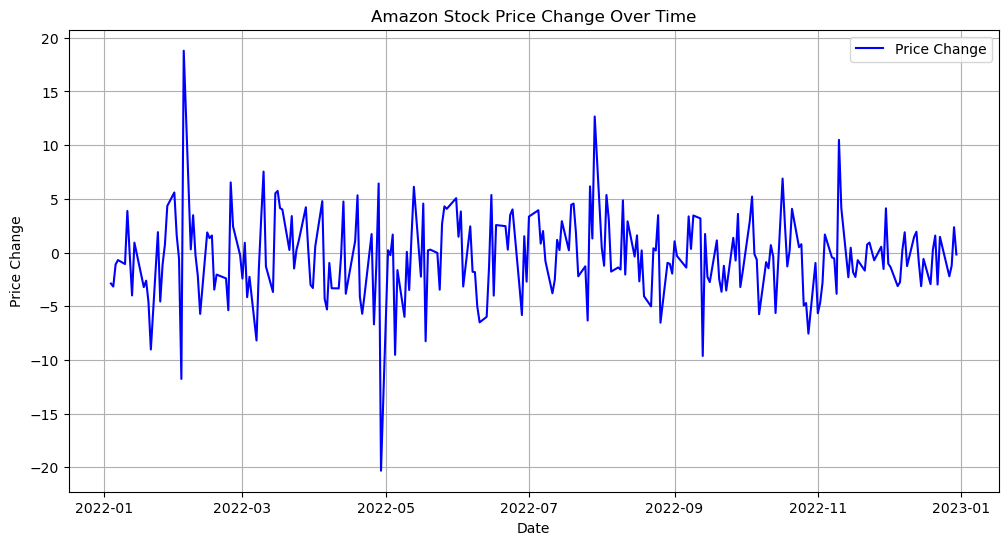

In [9]:
# Plot the change in stock price over time
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Price Change'], label='Price Change', color='b')
plt.title('Amazon Stock Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.show()

# Amazon Stock Volume over time 

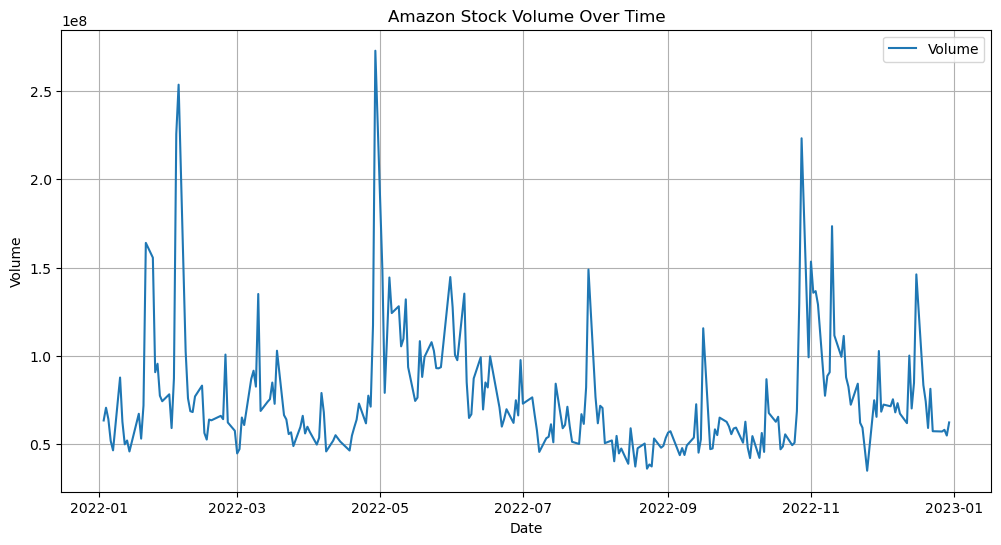

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Volume'], label='Volume')
plt.title('Amazon Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Moving Average of Stock prices


In [11]:
amazon_data['20-Day MA'] = amazon_data['Adj Close'].rolling(window=20).mean()
amazon_data['50-Day MA'] = amazon_data['Adj Close'].rolling(window=50).mean()
amazon_data
#20day moving average and 50 days moving average 

,Open,High,Low,Close,Adj Close,Volume,Price Change,20-Day MA,50-Day MA
Date,,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492,NaN,NaN
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009,NaN,NaN
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,-1.102997,NaN,NaN
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,-0.699997,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,1.459999,89.827499,96.9226
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,-2.209999,89.282000,96.4454
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,-1.220001,88.752000,95.8060


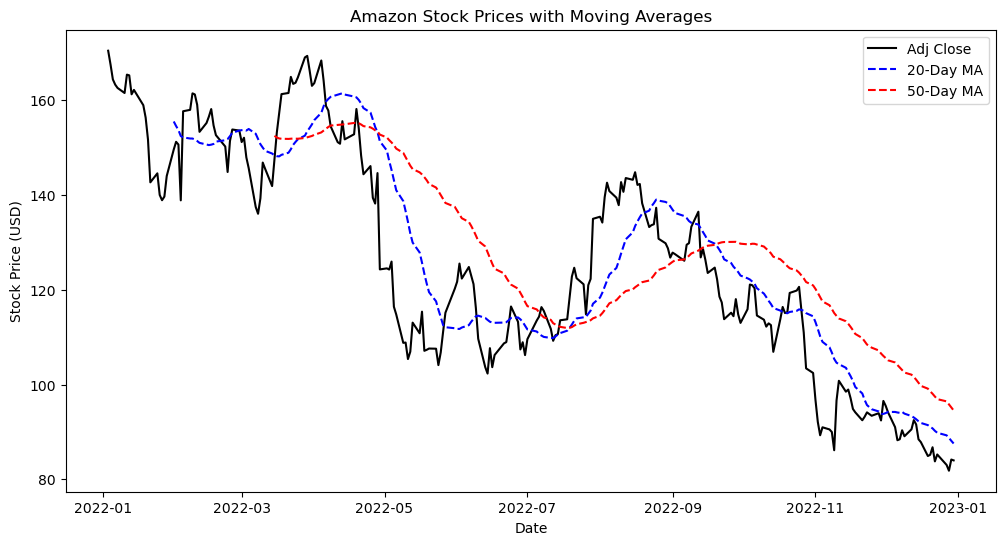

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Adj Close'], label='Adj Close', color='black')
plt.plot(amazon_data.index, amazon_data['20-Day MA'], label='20-Day MA', linestyle='--', color='blue')
plt.plot(amazon_data.index, amazon_data['50-Day MA'], label='50-Day MA', linestyle='--', color='red')
plt.title('Amazon Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Daily Return of Average Stocks

In [13]:
amazon_data['Daily Return'] = amazon_data['Adj Close'].pct_change()
amazon_data

,Open,High,Low,Close,Adj Close,Volume,Price Change,20-Day MA,50-Day MA,Daily Return
Date,,,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN,NaN,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492,NaN,NaN,-0.016916
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009,NaN,NaN,-0.018893
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,-1.102997,NaN,NaN,-0.006711
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,-0.699997,NaN,NaN,-0.004288
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,1.459999,89.827499,96.9226,0.017425
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,-2.209999,89.282000,96.4454,-0.025924
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,-1.220001,88.752000,95.8060,-0.014692


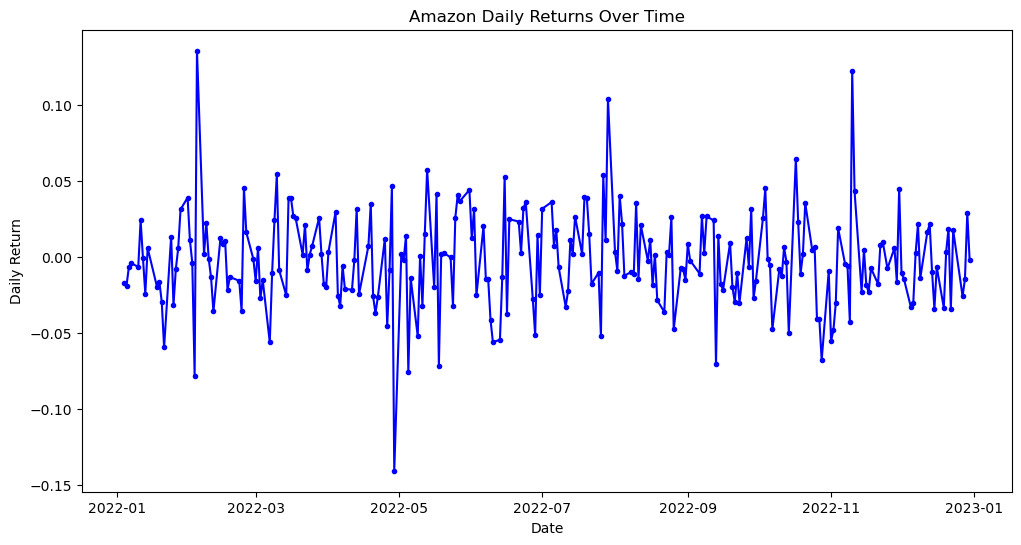

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Daily Return'], marker='.', linestyle='-', color='blue')

# Adding labels and title
plt.title('Amazon Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

# Add a new Trend column

In [15]:
amazon_data['Trend'] = ['Up' if x > 0 else 'Down' if x < 0 else 'Neutral' for x in amazon_data['Daily Return']]

In [16]:
amazon_data

,Open,High,Low,Close,Adj Close,Volume,Price Change,20-Day MA,50-Day MA,Daily Return,Trend
Date,,,,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN,NaN,NaN,Neutral
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492,NaN,NaN,-0.016916,Down
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009,NaN,NaN,-0.018893,Down
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,-1.102997,NaN,NaN,-0.006711,Down
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,-0.699997,NaN,NaN,-0.004288,Down
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,1.459999,89.827499,96.9226,0.017425,Up
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,-2.209999,89.282000,96.4454,-0.025924,Down
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,-1.220001,88.752000,95.8060,-0.014692,Down


#  Visualise the Data through a Pie Chart

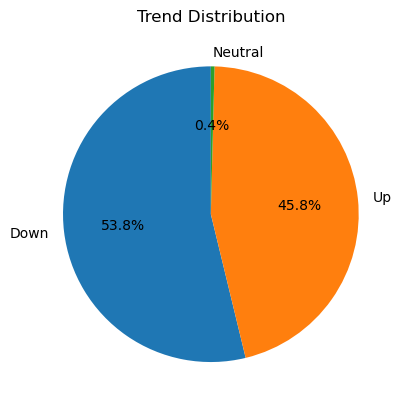

In [17]:
trend_counts = amazon_data['Trend'].value_counts()
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Trend Distribution')
plt.show()

# ##### Moving on to combined analysis

In [18]:
#data from Google, Amazon, Microsoft and Apple
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
stock_data = yf.download(stocks, start='2022-01-01', end='2023-01-01')
print(stock_data.head())

[*********************100%%**********************]  4 of 4 completed
             Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  180.190964  170.404495  144.991501  329.394806  182.009995   
2022-01-04  177.904053  167.522003  144.399506  323.746674  179.699997   
2022-01-05  173.171844  164.356995  137.774994  311.318756  174.919998   
2022-01-06  170.281021  163.253998  137.747498  308.858765  172.000000   
2022-01-07  170.449310  162.554001  137.016998  309.016205  172.169998   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003

# Data visualisation

In [19]:
stock_data

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  180.190964  170.404495  144.991501  329.394806  182.009995   
2022-01-04  177.904053  167.522003  144.399506  323.746674  179.699997   
2022-01-05  173.171844  164.356995  137.774994  311.318756  174.919998   
2022-01-06  170.281021  163.253998  137.747498  308.858765  172.000000   
2022-01-07  170.449310  162.554001  137.016998  309.016205  172.169998   
...                ...         ...         ...         ...         ...   
2022-12-23  131.299820   85.250000   89.230003  237.112076  131.860001   
2022-12-27  129.477600   83.040001   87.389999  235.354080  130.029999   
2022-12-28  125.504539   81.820000   86.019997  232.940552  126.040001   
2022-12-29  129.059387   84.180000   88.449997  239.376648  129.610001   
2022-12-30  129.378006   84.000000   88.230003  238.194702  129.929993   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003  144.399506  329.010010  182.940002  171.399994  ...   
2022-01-05  164.356995  137.774994  316.380005  180.169998  167.126495  ...   
2022-01-06  163.253998  137.747498  313.880005  175.300003  164.800003  ...   
2022-01-07  162.554001  137.016998  314.040009  174.139999  165.243500  ...   
...                ...         ...         ...         ...         ...  ...   
2022-12-23   85.250000   89.230003  238.729996  132.419998   85.779999  ...   
2022-12-27   83.040001   87.389999  236.960007  131.410004   85.349998  ...   
2022-12-28   81.820000   86.019997  234.529999  131.029999   83.480003  ...   
2022-12-29   84.180000   88.449997  241.009995  130.479996   84.550003  ...   
2022-12-30   84.000000   88.230003  239.820007  129.949997   84.050003  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2022-01-03  143.712997  329.779999  177.830002  167.550003  145.054993   
2022-01-04  143.716507  326.119995  182.630005  170.438004  145.395996   
2022-01-05  137.688004  315.980011  179.610001  166.882996  144.419998   
2022-01-06  136.558502  311.489990  172.699997  163.450500  136.998505   
2022-01-07  135.766495  310.089996  172.889999  163.839005  138.145493   
...                ...         ...         ...         ...         ...   
2022-12-23   87.070000  233.940002  130.919998   83.250000   87.110001   
2022-12-27   87.010002  235.830002  131.380005   84.970001   88.800003   
2022-12-28   85.940002  234.169998  129.669998   82.800003   86.980003   
2022-12-29   86.610001  235.649994  127.989998   82.870003   86.620003   
2022-12-30   86.570000  236.660004  128.410004   83.120003   86.980003   

                           Volume                                
                  MSFT       AAPL      AMZN     GOOGL      MSFT  
Date                                                             
2022-01-03  335.350006  104487900  63520000  28646000  28865100  
2022-01-04  334.829987   99310400  70726000  28400000  32674300  
2022-01-05  325.859985   94537600  64302000  54618000  40054300  
2022-01-06  313.149994   96904000  51958000  37348000  39646100  
2022-01-07  314.149994   86709100  46606000  29760000  32720000  
...                ...        ...       ...       ...       ...  
2022-12-23  236.110001   63814900  57433700  23003000  21207000  
2022-12-27  238.699997   69007800  57284000  20097300  16688600  
2022-12-28  236.889999   85438400  58228600  19523200  17457100  
2022-12-29  235.649994   75703700  54995

In [20]:
stock_data.isnull().sum()

Adj Close  AAPL     0
           AMZN     0
           GOOGL    0
           MSFT     0
Close      AAPL     0
           AMZN     0
           GOOGL    0
           MSFT     0
High       AAPL     0
           AMZN     0
           GOOGL    0
           MSFT     0
Low        AAPL     0
           AMZN     0
           GOOGL    0
           MSFT     0
Open       AAPL     0
           AMZN     0
           GOOGL    0
           MSFT     0
Volume     AAPL     0
           AMZN     0
           GOOGL    0
           MSFT     0
dtype: int64

# Change in stock price over time

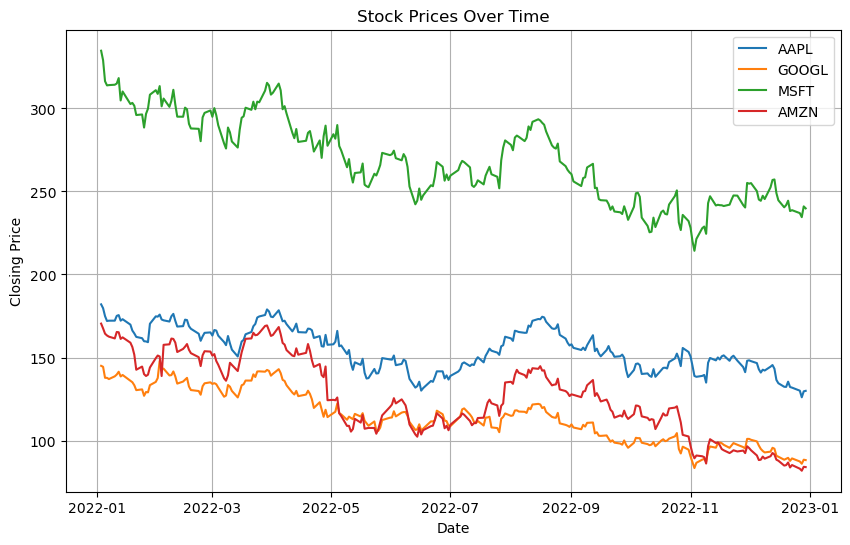

In [21]:
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data['Close'][stock], label=stock)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the change in a stock’s volume over time 

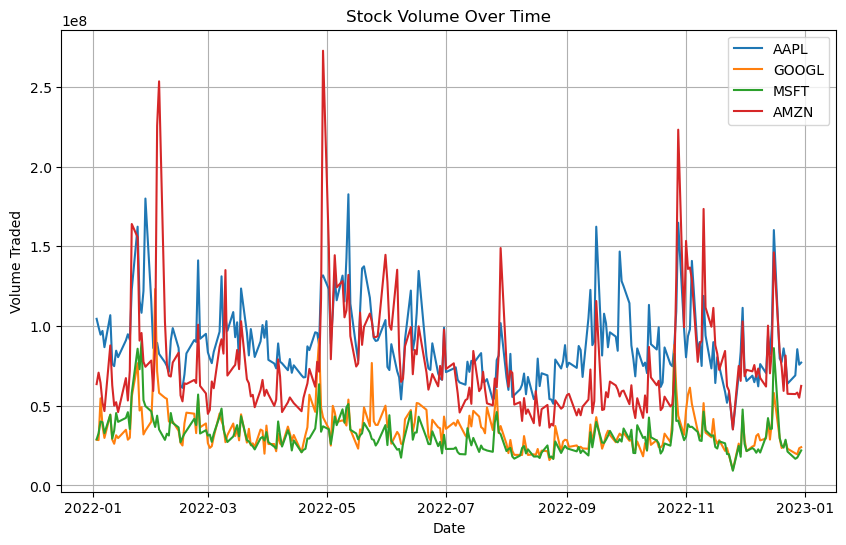

In [22]:
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data['Volume'][stock], label=stock)
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.legend()
plt.grid(True)
plt.show()

# Moving average of various stocks

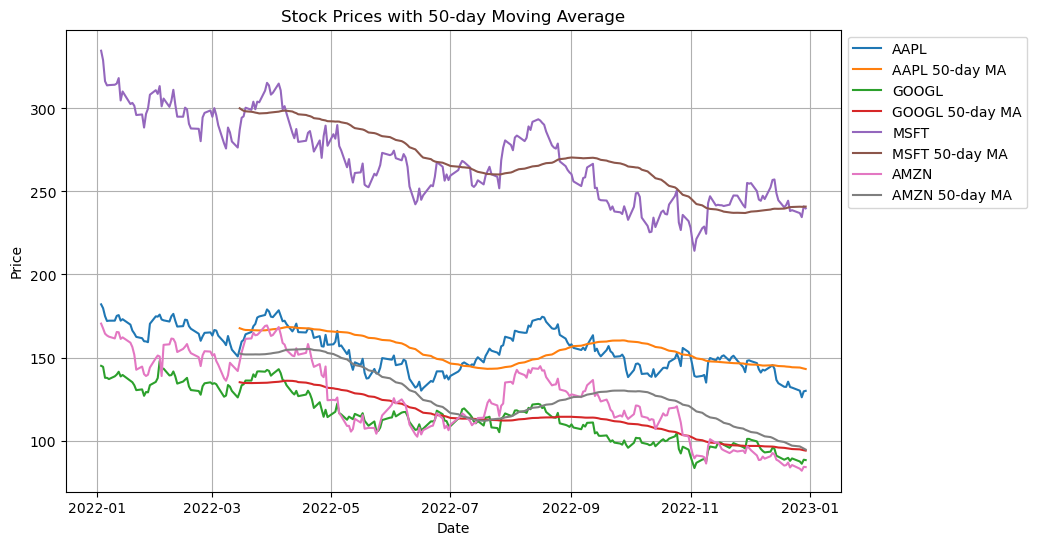

In [23]:
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data['Close'][stock], label=stock)
    plt.plot(stock_data['Close'][stock].rolling(window=50).mean(), label=f'{stock} 50-day MA')

plt.title('Stock Prices with 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

# Daily return average of a stock

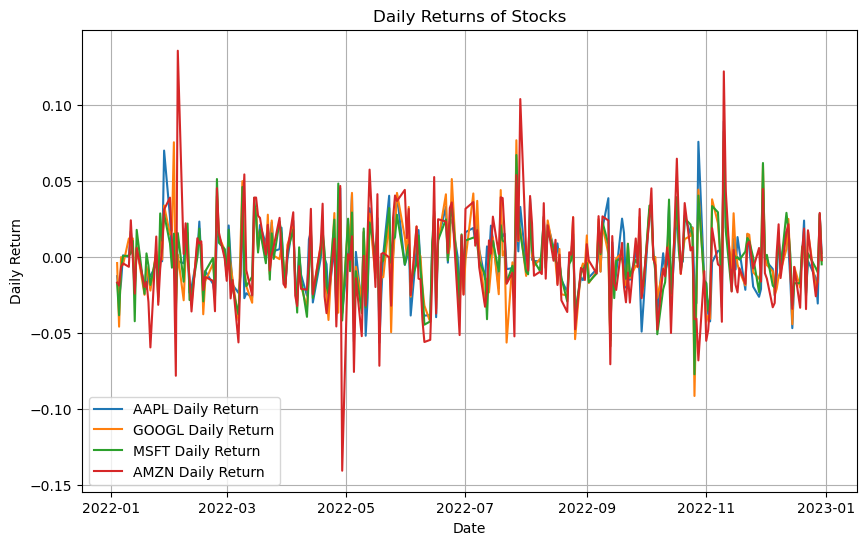

Maximum Daily Return for AAPL: 0.08897457132383879
Maximum Daily Return for GOOGL: 0.07655685747975283
Maximum Daily Return for MSFT: 0.08226805787098601
Maximum Daily Return for AMZN: 0.13535901735711864


In [24]:
for stock in stocks:
    stock_data[f'{stock}_Daily_Return'] = stock_data['Close'][stock].pct_change()

# Plot daily return
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data[f'{stock}_Daily_Return'], label=f'{stock} Daily Return')

plt.title('Daily Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()
for stock in stocks:
    max_return = stock_data[f'{stock}_Daily_Return'].max()
    print(f'Maximum Daily Return for {stock}: {max_return}')

In [25]:
#Adding a new trend column 

In [26]:
for stock in stocks:
    stock_data[f'{stock}_Trend'] = ['Up' if x > 0 else 'Down' if x < 0 else 'Stable' for x in stock_data[f'{stock}_Daily_Return']]

# Display the data with the new 'Trend' column
print(stock_data.head())

             Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  180.190964  170.404495  144.991501  329.394806  182.009995   
2022-01-04  177.904053  167.522003  144.399506  323.746674  179.699997   
2022-01-05  173.171844  164.356995  137.774994  311.318756  174.919998   
2022-01-06  170.281021  163.253998  137.747498  308.858765  172.000000   
2022-01-07  170.449310  162.554001  137.016998  309.016205  172.169998   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003  144.399506  329.010010  182.940002  171.399994  ...   
2022-01-05  

In [27]:
stock_data.head()

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  180.190964  170.404495  144.991501  329.394806  182.009995   
2022-01-04  177.904053  167.522003  144.399506  323.746674  179.699997   
2022-01-05  173.171844  164.356995  137.774994  311.318756  174.919998   
2022-01-06  170.281021  163.253998  137.747498  308.858765  172.000000   
2022-01-07  170.449310  162.554001  137.016998  309.016205  172.169998   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003  144.399506  329.010010  182.940002  171.399994  ...   
2022-01-05  164.356995  137.774994  316.380005  180.169998  167.126495  ...   
2022-01-06  163.253998  137.747498  313.880005  175.300003  164.800003  ...   
2022-01-07  162.554001  137.016998  314.040009  174.139999  165.243500  ...   

              Volume           AAPL_Daily_Return GOOGL_Daily_Return  \
               GOOGL      MSFT                                        
Date                                                                  
2022-01-03  28646000  28865100               NaN                NaN   
2022-01-04  28400000  32674300         -0.012692          -0.004083   
2022-01-05  54618000  40054300         -0.026600          -0.045876   
2022-01-06  37348000  39646100         -0.016693          -0.000200   
2022-01-07  29760000  32720000          0.000988          -0.005303   

           MSFT_Daily_Return AMZN_Daily_Return AAPL_Trend GOOGL_Trend  \
                                                                        
Date                                                                    
2022-01-03               NaN               NaN     Stable      Stable   
2022-01-04         -0.017147         -0.016916       Down        Down   
2022-01-05         -0.038388         -0.018893       Down        Down   
2022-01-06         -0.007902         -0.006711       Down        Down   
2022-01-07          0.000510         -0.004288         Up        Down   

           MSFT_Trend AMZN_Trend  
                                  
Date                              
2022-01-03     Stable     Stable  
2022-01-04       Down       Down  
2022-01-05       Down       Down  
2022-01-06       Down       Down  
2022-01-07         Up       Down  

[5 rows x 32 columns]

# Visualise the trend distribution through a pie chart

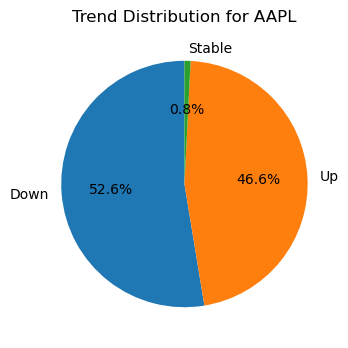

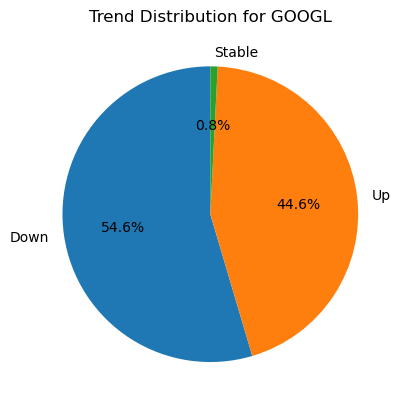

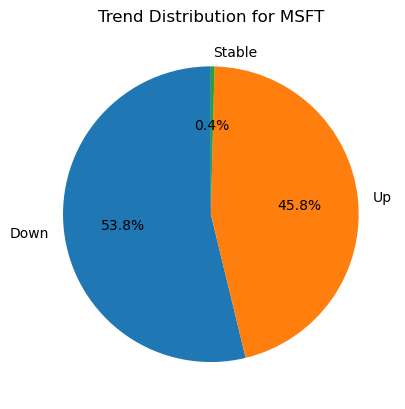

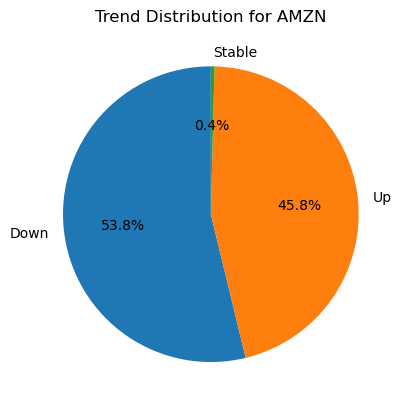

In [28]:
plt.figure(figsize=(5, 4))
for stock in stocks:
    trend_counts = stock_data[f'{stock}_Trend'].value_counts()
    plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Trend Distribution for {stock}')
    plt.show()

# the correlation between the daily returns of different stocks

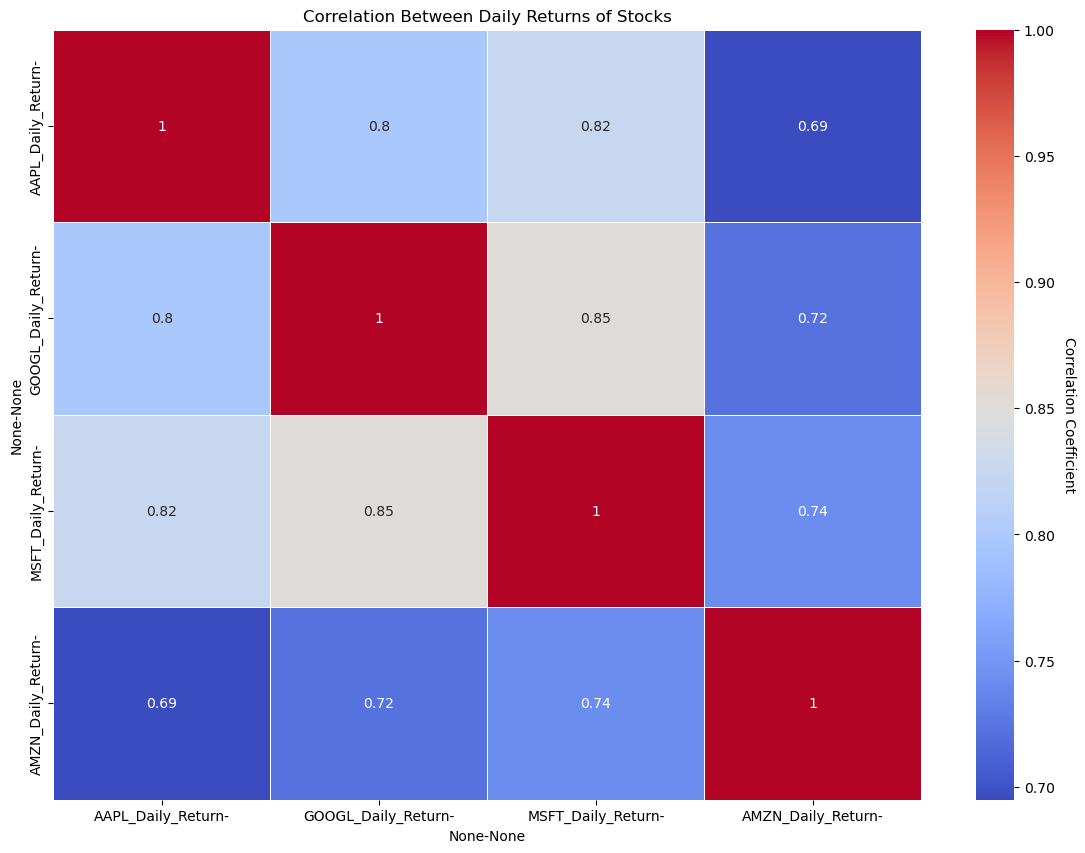

In [29]:
daily_returns = stock_data[[f'{stock}_Daily_Return' for stock in stocks]]
correlation_matrix = daily_returns.corr()
daily_returns = stock_data[[f'{stock}_Daily_Return' for stock in stocks]]
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Add a label to the colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

plt.title('Correlation Between Daily Returns of Stocks')
plt.show()
